In [51]:
import numpy as np
import pandas as pd
import math

In [52]:
df = pd.read_csv('data/monodimensionale.csv', sep=';')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACCX    1042 non-null   float64
 1   ACCY    1042 non-null   float64
 2   ACCZ    1042 non-null   float64
 3   GYROX   1042 non-null   float64
 4   GYROY   1042 non-null   float64
 5   GYROZ   1042 non-null   float64
 6   ANGLX   1042 non-null   float64
 7   ANGLY   1042 non-null   float64
 8   ANGLZ   1042 non-null   float64
dtypes: float64(9)
memory usage: 73.4 KB


In [54]:
import plotly.express as px

In [55]:
fig = px.line(df, y=["ACCX", "ACCY", "ACCZ"])
fig.show()

In [56]:
y, v = [0], [0]
a = np.array(df["ACCY"])
delta_t = 0.01

In [57]:
from scipy.signal import lfilter

In [58]:
n = 10
b = [1.0 / n] * n
c = 1
aa = lfilter(b,c,a)

In [59]:
fig = px.line(aa)
fig.show()

non va bene, da una parte rende smooth i momenti di stasi ma ha abbassato il max da ~1g a ~0.35g

In [10]:
aa = a + 0.02

In [60]:
for a_y in aa:
    v.append(v[-1] + a_y*delta_t)

In [61]:
fig = px.line(v)
fig.show()

In [62]:
for a_y, v_y in zip(aa, v):
    y.append(y[-1] + v_y*delta_t + 0.5*a_y*(delta_t**2))

In [63]:
fig = px.line(y)
fig.show()

c'è di sicuro qualche errore, un'idea può essere che l'accelerometro non è in bolla e anche sull'asse y subisce dell'accelerazione gravitazionale

In [64]:
mod_g = math.sqrt(df["ACCX"][0]**2 + df["ACCY"][0]**2 + df["ACCZ"][0]**2)

In [65]:
mod_g

1.1405700329221349

In [66]:
df = pd.read_csv("data/monoangolo.csv", sep=";")

In [68]:
fig = px.scatter_polar(df["ANGLY"]*(180/np.pi), theta="ANGLY")
fig.show()

In [85]:
cartesian_np = np.array([[math.cos(y) for y in df["ANGLY"]], [math.sin(y) for y in df["ANGLY"]]]).T
cartesian = pd.DataFrame(cartesian_np, columns=["X", "Y"])

In [86]:
cartesian

,X,Y
0,-0.304300,0.952576
1,-0.246632,0.969109
2,-0.188077,0.982154
3,-0.128844,0.991665
4,-0.069148,0.997606
...,...,...
1041,0.973666,0.227978
1042,0.968912,0.247404
1043,0.980067,0.198669
1044,0.987227,0.159318


In [75]:
fig = px.scatter(cartesian)
fig.show()

In [76]:
import matplotlib.pyplot as plt

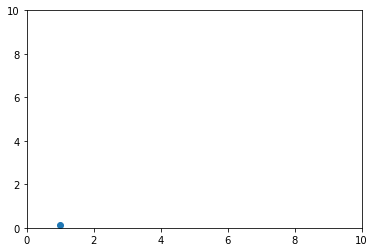

In [94]:
fig, ax = plt.subplots()

t=0
for point in cartesian_np:
    if t == 0:
        points, = ax.plot(point[0], point[1], marker='o', linestyle='None')
        ax.set_xlim(0, 10) 
        ax.set_ylim(0, 10) 
    else:
        points.set_data(point[0], point[1])
    t += 1
    #plt.pause(0.1)